## Visualize the outputs from `params/param_default-example.ini`

Note the paramter set `param_default-example.ini` was designed as an example to test that everything is installed correctly and give you a feel for `forward-dream`. It only runs for ten years -- too short to reach genetic equilibrium. Otherwise, the parameter values are the same as those in Table 1. of the manuscript.

In [1]:
import numpy as np
import pandas as pd
import os

from lib.plotting import *
from lib.response import *
from lib.preferences import *

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as patches
import seaborn as sns

import matplotlib.gridspec as gridspec

# inline stylization
%matplotlib inline
sns.set_style("ticks")
sns.set_style("white")

plt.rcParams["figure.dpi"] = 100
plt.rcParams["savefig.dpi"] = 150
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True

In [3]:
# Font sizes
plt.rc('font', size=12)         # controls default text sizes
plt.rc('axes', titlesize=14)    # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize

## Preferences

In [4]:
analysis_metrics = ["HX", "VX", 
                    'frac_mixed_samples','mean_k',
                    'n_segregating','pi','theta',
                    'avg_frac_ibd', 'avg_n_ibd','avg_l_ibd']

In [5]:
genetic_names.update({
    "mean_k": "C.O.I ($k$)",
    "pi": "Nucl. Diversity ($\pi$)",
    "avg_l_ibd": "Avg. IBD\nTrack Length (bp)"
})

In [6]:
time_limits = (0, 365*10)

In [7]:
savefig = True

## Load Simulation

In [8]:
sim_path = "../results/default/sim_default-example_0001/"

In [9]:
# Load full data frame
epoch_df = pd.read_csv(os.path.join(sim_path, "epoch_df.csv"))
epoch_df.index = epoch_df.name
og = pd.read_csv(os.path.join(sim_path, "og.csv"))
op = pd.read_csv(os.path.join(sim_path, "op.csv"))

# Merge on time
ot = pd.merge(left=op, right=og, on="t0")

In [10]:
epoch_df

,name,t0,t1,gen_rate,gens,x_h,x_v
name,,,,,,,
init,init,0.0,1825.0,531.529915,970042.094017,0.653846,0.075556
ReduceVectors,ReduceVectors,1825.0,3650.0,258.666667,472066.666667,0.333333,0.040000


## Plot

### Prevalence

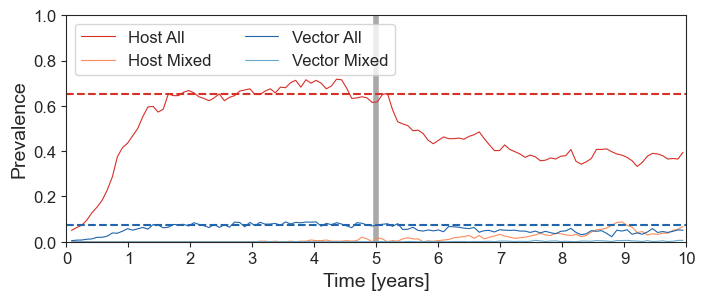

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

prevalence_trajectory_plot(ot, epoch_df, ax,
                           col_dt=prevalence_col_dt,
                           norm_t0=None,
                           indicate_epochs=None,
                           indicate_equilibriums=None,
                           time_limits=time_limits,
                           years_per_major_tick=1)

ax.axhline(epoch_df.loc["init", "x_h"], linestyle="dashed", color=prevalence_col_dt["HX"])
ax.axhline(epoch_df.loc["init", "x_v"], linestyle="dashed", color=prevalence_col_dt["VX"])
ax.axvline(epoch_df.loc["ReduceVectors", "t0"], linestyle="solid", linewidth=4, color="darkgrey", zorder=-1)
ax.set_xlabel("Time [years]")
ax.set_ylabel("Prevalence")
ax.legend(loc="upper left", ncol=2)

if savefig:
    fig.savefig("../figs/sec0_default-prevalence.png", bbox_inches="tight", pad_inches=0.5)
    fig.savefig("../figs/sec0_default-prevalence.pdf", bbox_inches="tight", pad_inches=0.5)

The vertical bar indicates the beginning of a reduction in the number of vectors in the simulation.

### Genetics

In [12]:
metrics = ["mean_k", "pi", "avg_l_ibd", "tajd", "n_segregating", "n_singletons"]
n_metrics = len(metrics)

In [13]:
genetic_names.update({"avg_l_ibd": "Avg. IBD Track Length (bp)"})

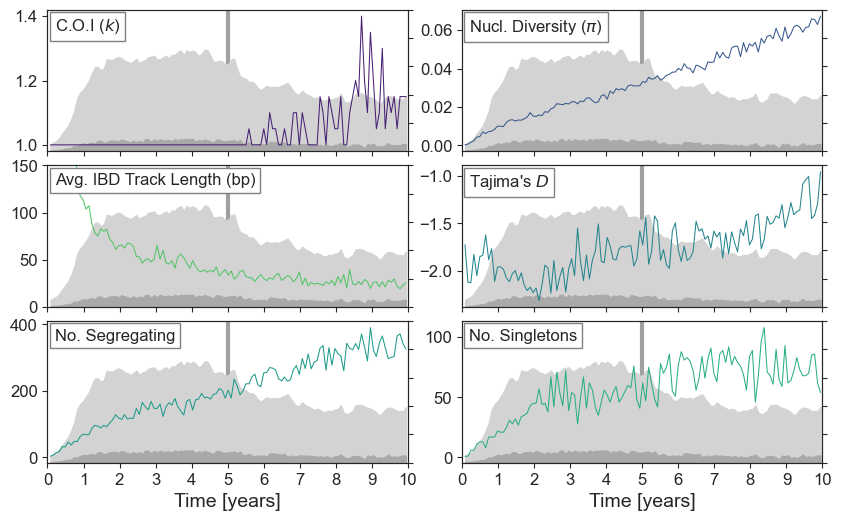

In [14]:
fig, axes = plt.subplots(int(n_metrics/2), 2, figsize=(10, 6), sharex=True)
fig.subplots_adjust(hspace=0.1, wspace=0.15)

for ax, metric in zip(axes.flatten(), metrics):
    
    # Raw
    genetic_trajectory_plot(metric, ot, epoch_df,
                            tight_metric_col_dt[metric], ax,
                            norm_t0=None,
                            indicate_epochs=[("ReduceVectors", "t0")],
                            time_limits=time_limits,
                            years_per_major_tick=1)
    
    if metric == "avg_l_ibd":
        ax.set_ylim((0, 150))
        
    if metric in ["n_segregating", "n_singletons"]:
        ax.set_xlabel("Time [years]")

    # y
    #ax.set_ylabel(genetic_names[metric], fontsize=12)
    #ax.set_title(genetic_names[metric], fontsize=12, loc="left")
    ax.annotate(s=genetic_names[metric], xy=(0.02, 0.95), xycoords="axes fraction", 
                ha="left", va="top",
                bbox=dict(boxstyle="square", fc="white", ec="grey", lw=1))
    
if savefig:
    fig.savefig("../figs/sec0_default-genetics.png", bbox_inches="tight", pad_inches=0.5)
    fig.savefig("../figs/sec0_default-genetics.pdf", bbox_inches="tight", pad_inches=0.5)

In [15]:
metric

'n_singletons'